In [25]:
import pandas as pd
from mplsoccer import Radar, FontManager, grid
import matplotlib.pyplot as plt

In [26]:
#Import data
df=pd.read_csv("Possesion - Folha1.csv")

In [27]:
#Df columns
df.columns

Index(['Player', 'Nation', 'Position', 'Squad', 'Age', 'Born', '90s',
       'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen',
       'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%', 'Carries', 'TotDist',
       'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR'],
      dtype='object')

In [28]:
#Filter data
df = df[(df["90s"] > 10) & (df["Born"] >= 2000) & (df["Position"] == "MF")]

In [29]:
df.head()

,Player,Nation,Position,Squad,Age,Born,90s,Touches,Def Pen,Def 3rd,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
169,Carlos Baleba,cm CMR,MF,Brighton,20-354,2004,11.0,618,22,125,...,352,2176,1123,21,21,2,11,17,382,10
194,Mateus Fernandes,pt POR,MF,Southampton,20-165,2004,12.7,683,34,163,...,368,2360,1221,35,24,5,18,14,453,40
195,Enzo Fernández,ar ARG,MF,Chelsea,23-340,2001,11.8,820,20,131,...,417,1512,714,13,11,2,14,13,594,42
197,Morgan Gibbs-White,eng ENG,MF,Nott'ham Forest,24-330,2000,11.2,613,16,74,...,359,1941,1027,29,19,6,26,20,460,44
199,João Gomes,br BRA,MF,Wolves,23-314,2001,14.1,743,22,169,...,389,2496,1319,28,26,4,12,20,479,30


In [30]:
#Delete unwanted columns
columns_to_drop = ['Nation', 'Position',"Squad","Age","Born","90s","Def Pen",'Att Pen','Tkld','Succ', "Att", 'CPA','PrgR',"TotDist"] 
df = df.drop(columns=columns_to_drop)

In [31]:
df.head()

,Player,Touches,Def 3rd,Mid 3rd,Att 3rd,Live,Succ%,Tkld%,Carries,PrgDist,PrgC,1/3,Mis,Dis,Rec
169,Carlos Baleba,618,125,375,140,618,53.6,39.3,352,1123,21,21,11,17,382
194,Mateus Fernandes,683,163,337,197,683,47.6,50.0,368,1221,35,24,18,14,453
195,Enzo Fernández,820,131,415,275,820,41.7,33.3,417,714,13,11,14,13,594
197,Morgan Gibbs-White,613,74,290,256,613,51.4,40.5,359,1027,29,19,26,20,460
199,João Gomes,743,169,421,164,743,61.9,28.6,389,1319,28,26,12,20,479


In [32]:
#Set index
df.set_index("Player", inplace=True)

In [20]:
df.head()

,169,194,195,197,199,200,240,254,259
Player,Carlos Baleba,Mateus Fernandes,Enzo Fernández,Morgan Gibbs-White,João Gomes,Ryan Gravenberch,Cole Palmer,Emile Smith Rowe,Dominik Szoboszlai
Touches,618,683,820,613,743,1065,798,668,690
Def 3rd,125,163,131,74,169,229,69,93,89
Mid 3rd,375,337,415,290,421,649,357,316,360
Att 3rd,140,197,275,256,164,199,382,266,252


In [33]:
#Transpose data
df=df.T

In [34]:
#Set parameters and attributes
params = list(df.index)
Baleba_values =list(df['Carlos Baleba'])

In [35]:
params

['Touches',
 'Def 3rd',
 'Mid 3rd',
 'Att 3rd',
 'Live',
 'Succ%',
 'Tkld%',
 'Carries',
 'PrgDist',
 'PrgC',
 '1/3',
 'Mis',
 'Dis',
 'Rec']

In [36]:
Baleba_values

[618.0,
 125.0,
 375.0,
 140.0,
 618.0,
 53.6,
 39.3,
 352.0,
 1123.0,
 21.0,
 21.0,
 11.0,
 17.0,
 382.0]

In [37]:
#Set min and max values
max_per_row = df.max(axis=1)

min_per_row=df.min(axis=1)



In [38]:
max_per_row

Touches    1065.0
Def 3rd     229.0
Mid 3rd     649.0
Att 3rd     382.0
Live       1065.0
Succ%        68.8
Tkld%        50.0
Carries     670.0
PrgDist    1743.0
PrgC         53.0
1/3          34.0
Mis          27.0
Dis          20.0
Rec         793.0
dtype: float64

In [39]:
min_per_row

Touches    613.0
Def 3rd     69.0
Mid 3rd    290.0
Att 3rd    140.0
Live       613.0
Succ%       40.4
Tkld%       28.6
Carries    352.0
PrgDist    714.0
PrgC        13.0
1/3         11.0
Mis         11.0
Dis          5.0
Rec        382.0
dtype: float64

In [45]:
#Build the radar chart
params = params
low =  min_per_row
high = max_per_row
#Invert parametres of bad indicatores
params_to_invert = ['Mis', 'Dis']

In [46]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              round_int=[False]*len(params),
              num_rings=5,  
              ring_width=1, center_circle_radius=1)

In [47]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [48]:
Baleba=Baleba_values

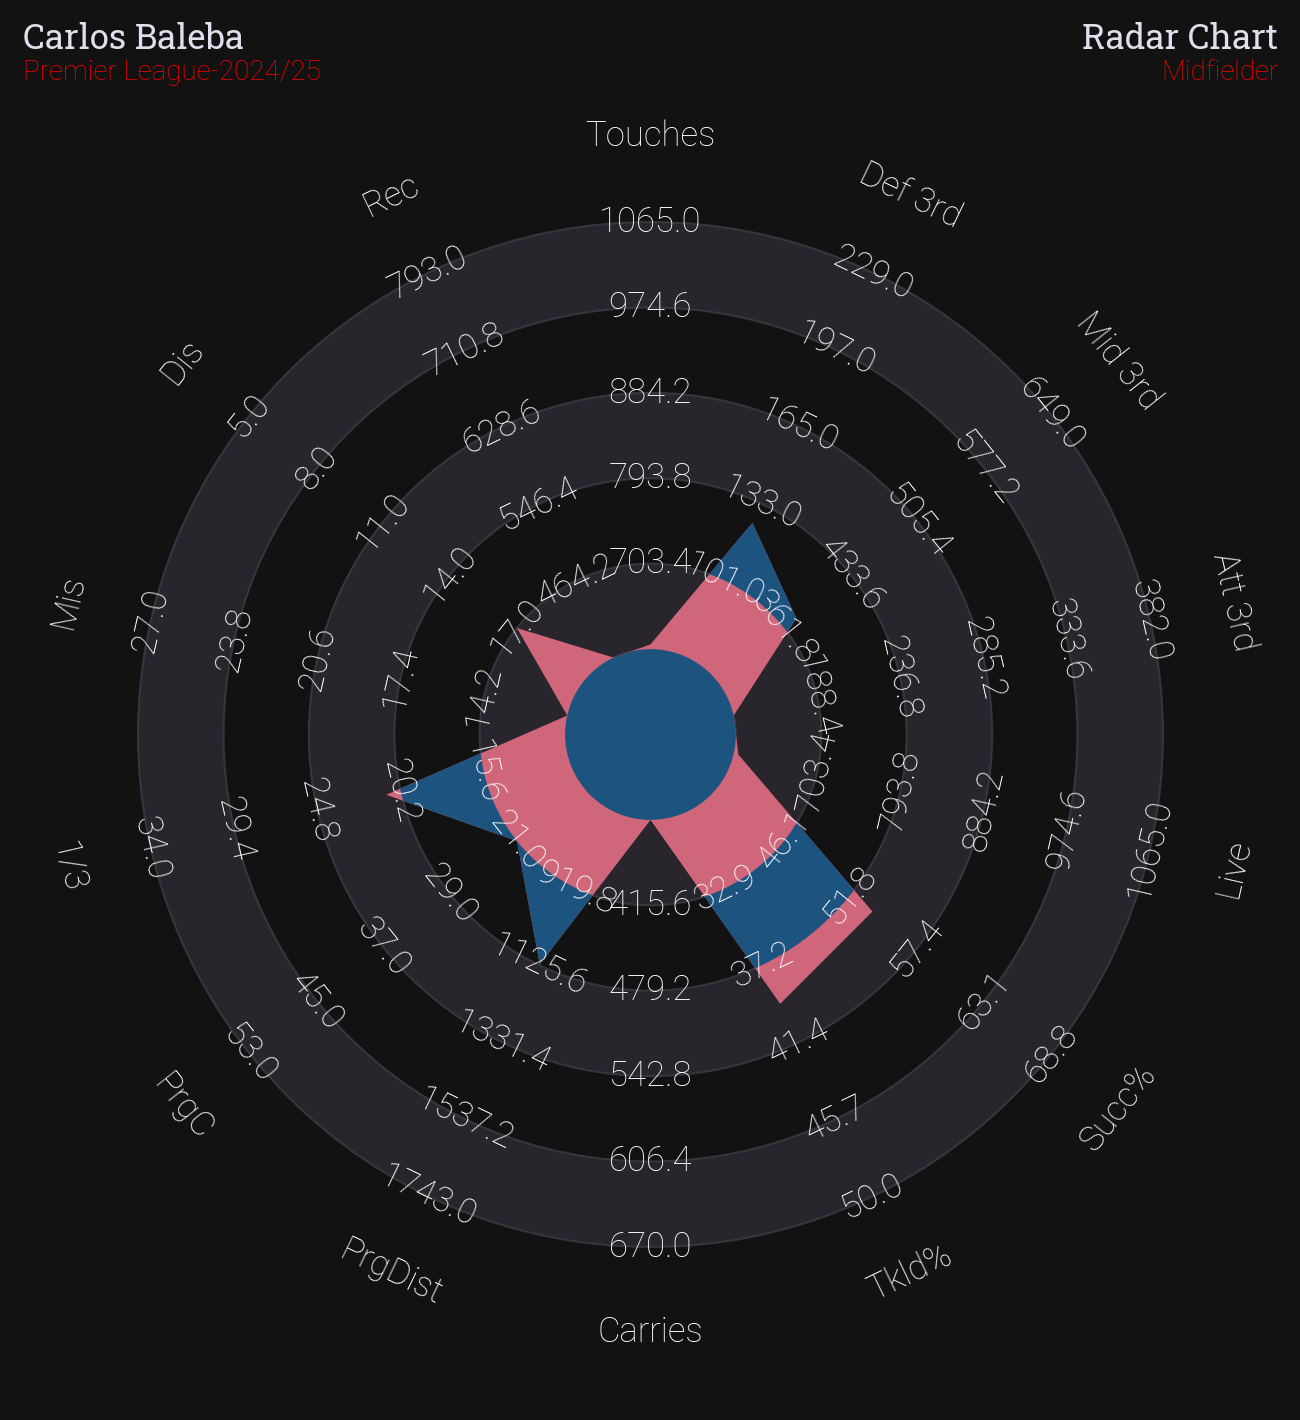

In [51]:
#Plot the radar
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)


radar.setup_axis(ax=axs['radar'], facecolor='None')
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#28252c', edgecolor='#39353f', lw=1.5)
radar_output = radar.draw_radar(Baleba, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#d0667a'},
                                kwargs_rings={'facecolor': '#1d537f'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25, color='#fcfcfc',
                                       fontproperties=robotto_thin.prop)



title1_text = axs['title'].text(0.01, 0.65, 'Carlos Baleba', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#e4dded')
title2_text = axs['title'].text(0.01, 0.25, 'Premier League-2024/25', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='red')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#e4dded')
title4_text = axs['title'].text(0.99, 0.25, 'Midfielder', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='red')

fig.set_facecolor('#121212')